In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ej_tract_la = pd.read_csv("./data/epa_data/EJSCREEN_2023_Tracts_LA.csv")
ej_tract_la

,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,6037101110,California,CA,Los Angeles,9,8.675543,80.34199,0.152921,30.0,0.3,412.030881,67.469349,993.0,0.605857,0.106838,0.244237,0.795922,0.000000,0.000256
1,6037101122,California,CA,Los Angeles,9,8.583354,80.78891,0.142590,30.0,0.3,406.773456,8.211294,543.0,0.380785,0.097973,0.222079,0.693245,0.000000,0.000231
2,6037101220,California,CA,Los Angeles,9,8.751636,80.06156,0.220801,30.0,0.4,428.325634,236.321440,724.0,0.517513,0.107420,0.193900,1.513152,0.000000,0.000243
3,6037101221,California,CA,Los Angeles,9,8.758052,80.02020,0.212167,30.0,0.4,414.553538,205.114598,395.0,0.253856,0.111107,0.236480,0.886912,0.000000,0.000267
4,6037101222,California,CA,Los Angeles,9,8.758052,80.02020,0.212167,30.0,0.4,421.390067,240.696137,318.0,0.319920,0.110726,0.215775,1.043853,0.000000,0.000257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,6037980038,California,CA,Los Angeles,9,10.380316,59.84402,0.470556,30.0,0.5,1185.245608,5.804078,0.0,0.000000,0.060805,0.676555,6.871613,1.440225,0.002242
2494,6037980039,California,CA,Los Angeles,9,9.939919,69.09249,NaN,NaN,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2495,6037990100,California,CA,Los Angeles,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2496,6037990200,California,CA,Los Angeles,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [3]:
census_la = pd.read_csv("./data/census_data/LA_County_Cleaned_Data.csv")
census_la.head()

,Geography,Geographic Area Name,Total population,Error!Total population,Total population!!White,Error!Total population!!White,Total population!!Black or African American,Error!Total population!!Black or African American,Total population!!Asian,Error!Total population!!Asian,Total population!!Hispanic or Latino (of any race),Error!Total population!!Hispanic or Latino (of any race)
0,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",3879,480,3174,420,73,53,442,114,1005,381
1,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",4247,875,3272,852,144,118,752,309,339,218
2,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3583,486,2531,489,23,27,371,178,1783,450
3,1400000US06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",3723,721,2685,642,128,97,273,232,1203,395
4,1400000US06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",2690,520,2443,483,17,29,131,197,915,667


In [5]:
census_la.Geography.str[10:].astype(int) == ej_tract_la.ID

0       True
1       True
2       True
3       True
4       True
        ... 
2493    True
2494    True
2495    True
2496    True
2497    True
Length: 2498, dtype: bool

Exctracting last 10 digits from 'Geopraphy' variable of census_la to match it with 'ID' variable of ej_tract_la

In [6]:
census_la.Geography = census_la.Geography.str[10:].astype(int)
census_la.head()

,Geography,Geographic Area Name,Total population,Error!Total population,Total population!!White,Error!Total population!!White,Total population!!Black or African American,Error!Total population!!Black or African American,Total population!!Asian,Error!Total population!!Asian,Total population!!Hispanic or Latino (of any race),Error!Total population!!Hispanic or Latino (of any race)
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",3879,480,3174,420,73,53,442,114,1005,381
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",4247,875,3272,852,144,118,752,309,339,218
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3583,486,2531,489,23,27,371,178,1783,450
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",3723,721,2685,642,128,97,273,232,1203,395
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",2690,520,2443,483,17,29,131,197,915,667


In [7]:
ej_census_df = ej_tract_la.merge(census_la, left_on='ID', right_on='Geography', sort=True)

In [8]:
ej_census_df

,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,PM25,OZONE,DSLPM,CANCER,RESP,...,Total population,Error!Total population,Total population!!White,Error!Total population!!White,Total population!!Black or African American,Error!Total population!!Black or African American,Total population!!Asian,Error!Total population!!Asian,Total population!!Hispanic or Latino (of any race),Error!Total population!!Hispanic or Latino (of any race)
0,6037101110,California,CA,Los Angeles,9,8.675543,80.34199,0.152921,30.0,0.3,...,3879,480,3174,420,73,53,442,114,1005,381
1,6037101122,California,CA,Los Angeles,9,8.583354,80.78891,0.142590,30.0,0.3,...,4247,875,3272,852,144,118,752,309,339,218
2,6037101220,California,CA,Los Angeles,9,8.751636,80.06156,0.220801,30.0,0.4,...,3583,486,2531,489,23,27,371,178,1783,450
3,6037101221,California,CA,Los Angeles,9,8.758052,80.02020,0.212167,30.0,0.4,...,3723,721,2685,642,128,97,273,232,1203,395
4,6037101222,California,CA,Los Angeles,9,8.758052,80.02020,0.212167,30.0,0.4,...,2690,520,2443,483,17,29,131,197,915,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,6037980038,California,CA,Los Angeles,9,10.380316,59.84402,0.470556,30.0,0.5,...,0,13,0,13,0,13,0,13,0,13
2494,6037980039,California,CA,Los Angeles,9,9.939919,69.09249,NaN,NaN,NaN,...,0,13,0,13,0,13,0,13,0,13
2495,6037990100,California,CA,Los Angeles,9,NaN,NaN,NaN,NaN,NaN,...,0,13,0,13,0,13,0,13,0,13
2496,6037990200,California,CA,Los Angeles,9,NaN,NaN,NaN,NaN,NaN,...,0,13,0,13,0,13,0,13,0,13


In [9]:
ej_census_df.iloc[:,6:].describe()

,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PRE1960PCT,PNPL,PRMP,...,Total population,Error!Total population,Total population!!White,Error!Total population!!White,Total population!!Black or African American,Error!Total population!!Black or African American,Total population!!Asian,Error!Total population!!Asian,Total population!!Hispanic or Latino (of any race),Error!Total population!!Hispanic or Latino (of any race)
count,2495.000000,2484.000000,2484.000000,2484.000000,2495.000000,2486.000000,2498.000000,2498.000000,2498.000000,2498.000000,...,2498.00000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,68.494760,0.367586,30.933977,0.407448,1678.464090,781.931126,635.508807,0.455072,0.224014,0.872873,...,4011.06285,602.570056,2128.285028,496.698559,372.722178,181.953963,670.449560,221.797838,1953.010008,456.268215
std,8.496955,0.122876,7.050624,0.086811,1966.225402,1073.455173,407.331439,0.245785,0.331117,1.283453,...,1470.99188,242.111108,1139.757866,232.646368,551.262112,166.802046,761.135514,168.896018,1422.184921,259.591107
min,54.966740,0.040077,10.000000,0.200000,0.000000,0.279978,0.000000,0.000000,0.000000,0.000000,...,0.00000,6.000000,0.000000,4.000000,0.000000,2.000000,0.000000,2.000000,0.000000,4.000000
25%,61.475520,0.307519,30.000000,0.400000,644.029755,172.487708,353.000000,0.273375,0.070770,0.179441,...,2993.25000,441.250000,1300.500000,339.000000,69.000000,64.000000,164.000000,108.000000,752.000000,257.000000
50%,66.986720,0.389547,30.000000,0.400000,1049.790331,327.580765,614.000000,0.479599,0.122969,0.362279,...,3933.00000,577.000000,1971.500000,465.000000,193.000000,137.000000,426.000000,187.000000,1691.500000,428.000000
75%,75.148480,0.443535,30.000000,0.500000,2098.208101,893.000668,874.000000,0.649896,0.212741,0.994518,...,4954.00000,736.750000,2778.750000,615.000000,425.000000,243.000000,863.750000,293.000000,2929.500000,602.750000
max,89.679380,1.219097,200.000000,1.000000,33308.307154,10277.550130,2416.000000,1.000000,4.333034,10.597832,...,13830.00000,2223.000000,7864.000000,2209.000000,5683.000000,1399.000000,5938.000000,1432.000000,8126.000000,2128.000000


In [10]:
ej_census_df2 = ej_census_df[['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'RSEI_AIR', 'PRE1960PCT',
                              'Total population!!White',
                              'Total population!!Black or African American', 'Total population!!Asian',
                              'Total population!!Hispanic or Latino (of any race)']]

In [11]:
ej_census_df2.corr()

,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PRE1960PCT,Total population!!White,Total population!!Black or African American,Total population!!Asian,Total population!!Hispanic or Latino (of any race)
PM25,1.000000,-0.280144,0.766029,0.470221,0.661023,0.223063,0.435932,-0.275637,0.031721,0.108049,0.253481
OZONE,-0.280144,1.000000,-0.510467,0.017227,-0.101996,-0.459180,-0.177115,0.102121,-0.253657,0.183384,0.070627
DSLPM,0.766029,-0.510467,1.000000,0.390118,0.635967,0.231254,0.382118,-0.320791,0.052497,0.002179,0.176460
CANCER,0.470221,0.017227,0.390118,1.000000,0.605828,-0.086947,0.284615,-0.244937,-0.060987,0.000493,0.173293
RESP,0.661023,-0.101996,0.635967,0.605828,1.000000,-0.130193,0.379843,-0.319022,0.009006,0.035709,0.104081
RSEI_AIR,0.223063,-0.459180,0.231254,-0.086947,-0.130193,1.000000,0.097722,-0.080841,0.278077,-0.077915,0.189757
PRE1960PCT,0.435932,-0.177115,0.382118,0.284615,0.379843,0.097722,1.000000,-0.047566,0.021116,-0.199486,0.237619
Total population!!White,-0.275637,0.102121,-0.320791,-0.244937,-0.319022,-0.080841,-0.047566,1.000000,-0.081400,-0.002702,0.159400
Total population!!Black or African American,0.031721,-0.253657,0.052497,-0.060987,0.009006,0.278077,0.021116,-0.081400,1.000000,-0.125091,0.065272
Total population!!Asian,0.108049,0.183384,0.002179,0.000493,0.035709,-0.077915,-0.199486,-0.002702,-0.125091,1.000000,-0.222920


<Axes: >

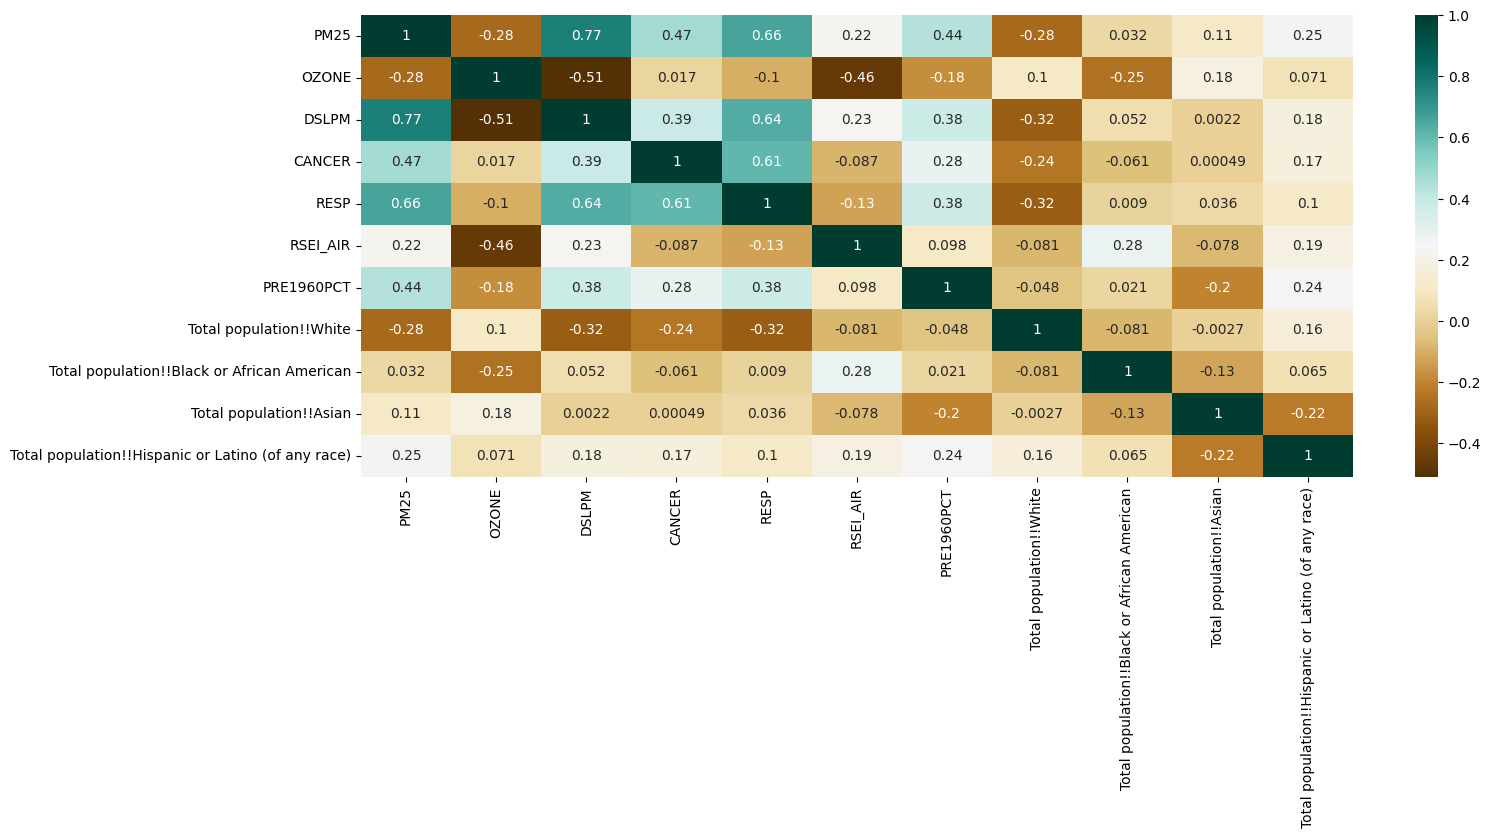

In [12]:
plt.figure(figsize=(16, 6))
sns.heatmap(ej_census_df2.corr(), annot=True, cmap='BrBG')

Does this imply that white population has more ozone risk than cancer? or Toxic air is mostly affecting black population?